In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars = pd.DataFrame(cars,columns=["HP","VOL","SP","WT","MPG"])
cars.head()
                                

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


##assumptions in multilinearRegression
1.Linearity
2.Independence
3.Homoscedasticity
4.Normal Distribution of errors
5.No multicollinearity

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

####Observations about info(), missing values

There are no missing values
There are 81 obseravtions(81 different cars data)
The data types of the columns are also relevant and valid

<function matplotlib.pyplot.show(close=None, block=None)>

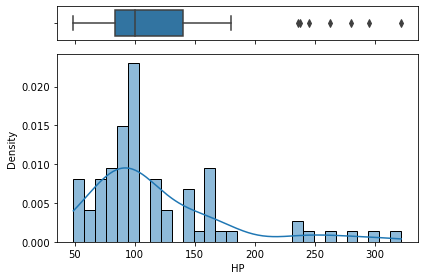

In [6]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x ='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')

sns.histplot(data=cars ,x='HP' , ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

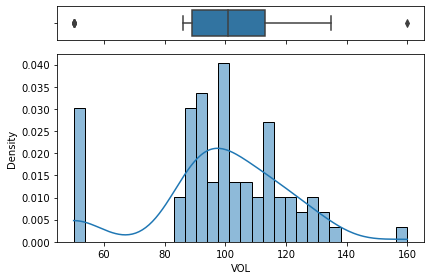

In [7]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x ='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')

sns.histplot(data=cars ,x='VOL' , ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

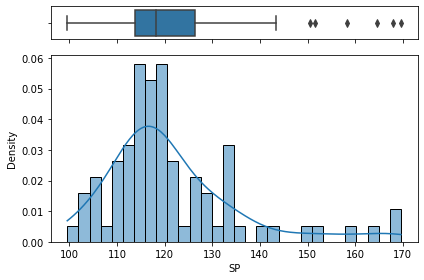

In [8]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x ='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')

sns.histplot(data=cars ,x='SP' , ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

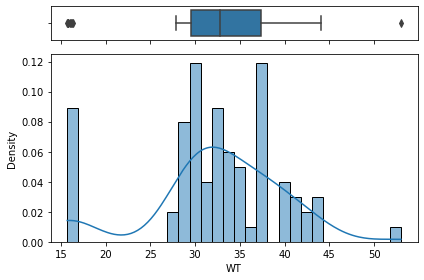

In [9]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x ='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='')

sns.histplot(data=cars ,x='WT' , ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

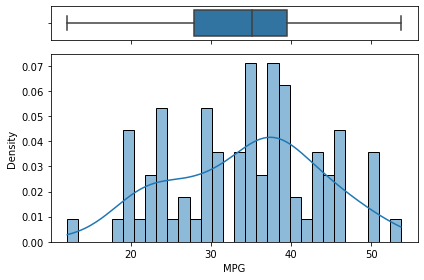

In [10]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x ='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='')

sns.histplot(data=cars ,x='MPG' , ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

plt.tight_layout()
plt.show

####Obseravtion from boxplot and histogram

. There are some extreme values(outliers) observed in towards the right tail of sp and distributions
.in VOL and WT colunms,a few outliers are observed in both tails of their distributions

In [11]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


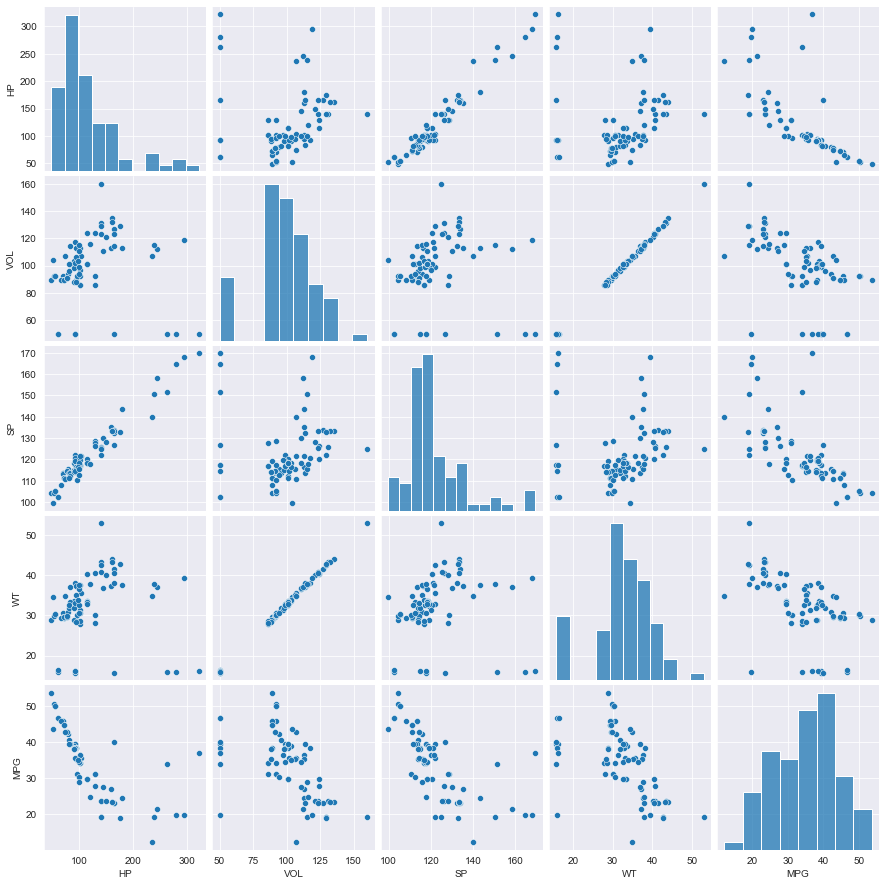

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(cars) 

In [13]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


#### Observations from correlation plots and cofficents
- Between x and y varibels are showing moderate to high correlation strengths,highest beingt betweeen HP and MPG
- THerefore this dataset qualifiers forn building a multiple linear regression model to predict MPGT
- Among x columans (x1,x2,x3 and x4),some very high corrrelation strengths are observed between SP vsHP,VOL vsWT
- The high correlation among x columans is not described as it maight lead to multicolinearity problem

In [14]:
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:38:40   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations from model summary
- The R-squared and adjusted R-squared values are good and about 75% of variabilityh in Y nis explained by x columns
- The probability value with respect to F-statistic is closed to zero,indicting that all or some of x columns are significant
- The p-values for VOL and WT are higher than 5% indicating some interating some interation issue among themselves which need to be futher explore

#### Performance materics for model1

In [16]:
df1 = pd.DataFrame()
df1["actual_y1"]=cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [17]:
pred_y1=model1.predict(cars.iloc[:,0:4])
df1["pred_y1"]=pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df1["actual_y1"], df1["pred_y1"])
print("MSE :", mse )
print("RMSE :",np.sqrt(mse))

MSE : 18.89714115234311
RMSE : 4.347084212704317


In [19]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [20]:
cars1 = cars.drop("WT", axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [21]:
model2 = smf.ols('MPG~HP+VOL+SP' ,data=cars1).fit()

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        12:38:41   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
df2 = pd.DataFrame()
df2["actual_y2"]=cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [24]:
pred_y2=model2.predict(cars.iloc[:,0:4])
df2["pred_y2"]=pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df2["actual_y2"], df2["pred_y2"])
print("MSE :", mse )
print("RMSE :",np.sqrt(mse))

MSE : 18.91105338871122
RMSE : 4.34868409851891


In [26]:
k = 3
n = 81
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.14814814814814814

In [27]:
cars1[cars1.index.isin([65,70,76,78,79,80])]

,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733
80,236,107,139.840817,12.101263


In [28]:
cars2=cars1.drop(cars1.index[[65,70,76,78,79,80]],axis=0).reset_index(drop=True)

In [29]:
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


In [30]:
model3=smf.ols('MPG~VOL+SP+HP',data = cars2).fit()

In [31]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.60e-33
Time:                        12:38:41   Log-Likelihood:                -187.46
No. Observations:                  75   AIC:                             382.9
Df Residuals:                      71   BIC:                             392.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6816     11.600      0.404      0.688     -18.448      27.811
VOL           -0.0952      0.021     -4.451      0.000      -0.138      -0.053
SP             0.6342      0.124      5.134      0.000       0.388       0.881
HP            -0.3350      0.034     -9.937      0.000      -0.402      -0.268
==============================================================================
Omnibus:                       20.724   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.198
Skew:                           1.233   Prob(JB):                     1.24e-06
Kurtosis:                       4.619   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df3= pd.DataFrame()
df3["actual_y3"]=cars2["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [35]:
pred_y3 = model3.predict(cars2.iloc[:,0:3])
df3["pred_y3"] = pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,45.872002
1,50.013401,44.385430
2,50.013401,44.385430
3,45.696322,44.433742
4,50.504232,44.421272


In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df3["actual_y3"],df3["pred_y3"])
print("MSE :", mse )
print("RMSE :",np.sqrt(mse))

MSE : 8.681197361563058
RMSE : 2.9463871710220055


#### Comparison of models
                     

| Metric         | Model 1 | Model 2 | Model 3 |
|----------------|---------|---------|---------|
| R-squared      | 0.771   | 0.770   | 0.885   |
| Adj. R-squared | 0.758   | 0.761   | 0.880   |
| MSE            | 18.89   | 18.91   | 8.68    |
| RMSE           | 4.34    | 4.34    | 2.94    |


- **From the above comparison table it is observed that model3 is the best among all with superior performance metrics**